In [1]:
import lifetimes

In [56]:
import csv

#with open('C:/Users/shashank/Documents/outputsamp.csv') as csvfile:
#    data = list(csv.reader(csvfile, delimiter=','))
    
import pandas as pd
data = pd.read_csv("C:/Users/shashank/Documents/BayesianABTesting/summary.csv")


In [57]:
from lifetimes import BetaGeoFitter

# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=0.0)




In [58]:
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 303113 subjects, a: 93321.61, alpha: 402.67, b: 472392.72, r: 1.31>


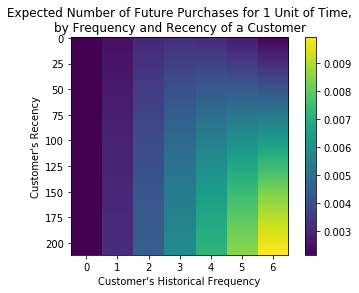

In [59]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)

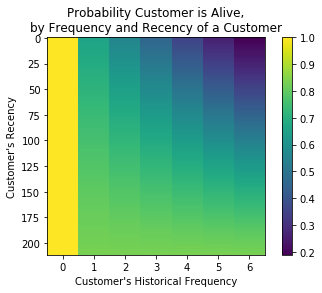

In [60]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)

In [61]:
t = 1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])
data.sort_values(by='predicted_purchases').tail(5)

,id,frequency,recency,T,predicted_purchases
83888,93718314,5.0,127.0,135.0,0.009633
34978,61126305,6.0,193.0,204.0,0.009820
13566,32263900,6.0,196.0,201.0,0.009999
146432,230952262,6.0,183.0,187.0,0.010256
146629,230967046,6.0,183.0,186.0,0.010295


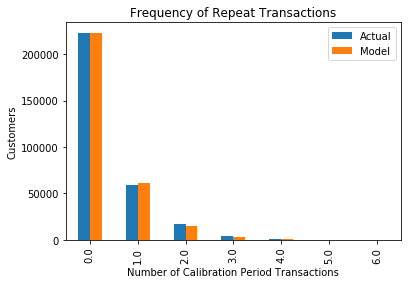

In [62]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [27]:
import pandas as pd
transaction_data = pd.read_csv("C:/Users/shashank/Documents/sample.csv")

In [55]:
from lifetimes.utils import summary_data_from_transaction_data
summary = summary_data_from_transaction_data(transaction_data, 'id', 'date', observation_period_end='2018-07-31')
summary.to_csv('summary.csv', index=True, header=True)
print(summary.head())

       frequency  recency      T
id                              
727          0.0      0.0  144.0
26773        2.0    168.0  188.0
28289        0.0      0.0   54.0
29488        0.0      0.0   74.0
31703        1.0     84.0  142.0


In [30]:
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)

<lifetimes.BetaGeoFitter: fitted with 303113 subjects, a: 48068.10, alpha: 504.32, b: 428816.46, r: 1.60>

In [31]:
from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(transaction_data, 'id', 'date',
                                        calibration_period_end='2018-07-31',
                                        observation_period_end='2018-09-10' )   
print(summary_cal_holdout.head())

       frequency_cal  recency_cal  T_cal  frequency_holdout  duration_holdout
id                                                                           
727              0.0          0.0  144.0                0.0                41
26773            2.0        168.0  188.0                0.0                41
28289            0.0          0.0   54.0                0.0                41
29488            0.0          0.0   74.0                0.0                41
31703            1.0         84.0  142.0                1.0                41


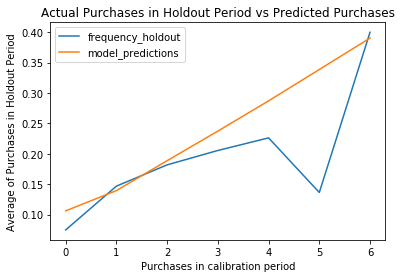

In [32]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

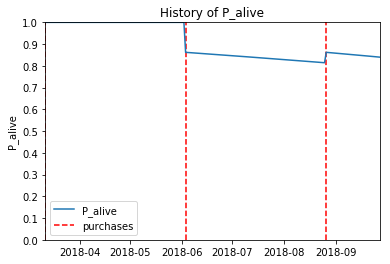

In [35]:
from lifetimes.plotting import plot_history_alive

id = 31703
days_since_birth = 200
sp_trans = transaction_data.loc[transaction_data['id'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'date')

In [36]:
import pandas as pd
transaction_data = pd.read_csv("C:/Users/shashank/Documents/samples.csv")

from lifetimes.utils import summary_data_from_transaction_data
summary = summary_data_from_transaction_data(transaction_data,  'id', 'date', 'monetary_value' , observation_period_end='2018-09-10')

print(summary.head())

       frequency  recency      T  monetary_value
id                                              
727          0.0      0.0  185.0            0.00
4640         0.0      0.0   32.0            0.00
6621         0.0      0.0   35.0            0.00
26773        2.0    168.0  229.0           19.95
28289        0.0      0.0   95.0            0.00


In [38]:
summary_with_money_value = summary
returning_customers_summary = summary_with_money_value[summary['frequency']>0]

print(returning_customers_summary.head())

       frequency  recency      T  monetary_value
id                                              
26773        2.0    168.0  229.0           19.95
31703        2.0    168.0  183.0           19.95
35384        2.0    140.0  144.0           19.95
43916        1.0     20.0  113.0           24.99
48721        1.0     28.0  241.0           19.95


In [39]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.001347
frequency,0.001347,1.000000


In [40]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 98724 subjects, p: 3.05, q: 8500324.13, v: 53386733.25>


In [45]:
ggf.conditional_expected_average_profit(
        summary_with_money_value['frequency'],
        summary_with_money_value['monetary_value'])


id
727          19.168588
4640         19.168588
6621         19.168588
26773        19.168588
28289        19.168588
29488        19.168588
31703        19.168588
34785        19.168588
35384        19.168588
42886        19.168588
43916        19.168590
45579        19.168588
46057        19.168588
48721        19.168588
58664        19.168588
63009        19.168588
63441        19.168588
65996        19.168588
81739        19.168588
91329        19.168588
96790        19.168588
98371        19.168588
101481       19.168588
108267       19.168588
116104       19.168588
122411       19.168588
124799       19.168588
126937       19.168588
127611       19.168588
132891       19.168588
               ...    
263892355    19.168588
263892463    19.168588
263892475    19.168588
263892551    19.168588
263892627    19.168588
263892782    19.168588
263892875    19.168588
263892922    19.168588
263893216    19.168588
263893260    19.168588
263893441    19.168588
263893830    19.168588
26389407

In [47]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary_with_money_value['frequency'],
        summary_with_money_value['monetary_value']
    ).mean(),
    summary_with_money_value[summary_with_money_value['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 19.168587891404137, Average profit: 19.177130280692452


In [ ]:
bgf.fit(summary_with_money_value['frequency'], summary_with_money_value['recency'], summary_with_money_value['T'])

ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    summary_with_money_value['frequency'],
    summary_with_money_value['recency'],
    summary_with_money_value['T'],
    summary_with_money_value['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).to_csv('out.csv', index=True, header=True)
